1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

few visualizations

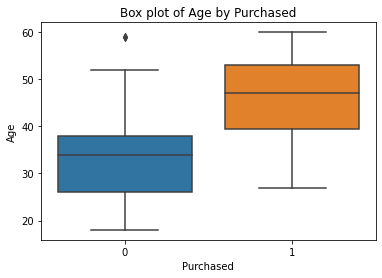

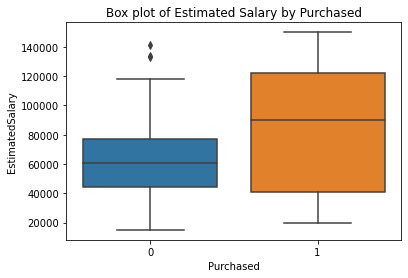

In [7]:
sns.boxplot(x='Purchased', y='Age', data=data)
plt.title('Box plot of Age by Purchased')
plt.show()

sns.boxplot(x='Purchased', y='EstimatedSalary', data=data)
plt.title('Box plot of Estimated Salary by Purchased')
plt.show()


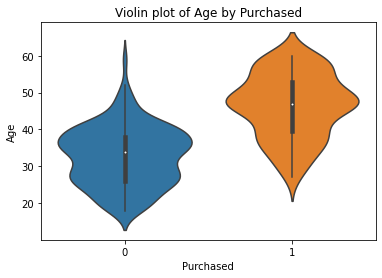

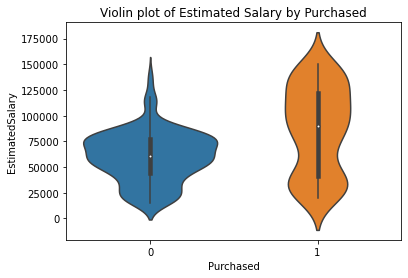

In [8]:
sns.violinplot(x='Purchased', y='Age', data=data)
plt.title('Violin plot of Age by Purchased')
plt.show()

sns.violinplot(x='Purchased', y='EstimatedSalary', data=data)
plt.title('Violin plot of Estimated Salary by Purchased')
plt.show()


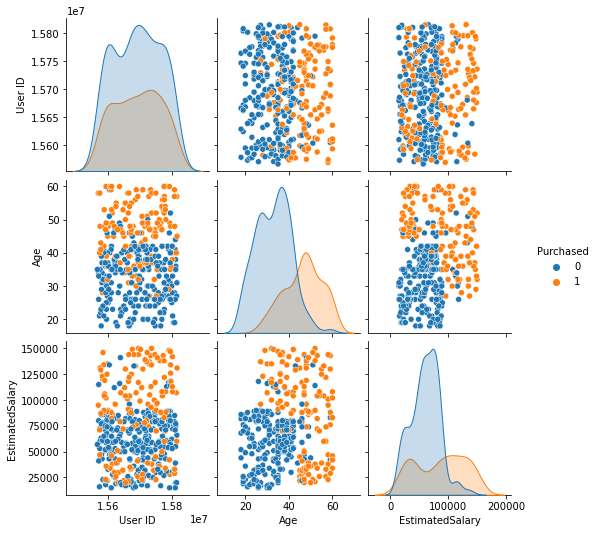

In [9]:
sns.pairplot(data=data, hue='Purchased')
plt.show()

The below correlation matrix helps us understand how the feature are correlated to each other. Here we can see that purchased and age are somewhat correlated, where as age and User ID are weakly correlated

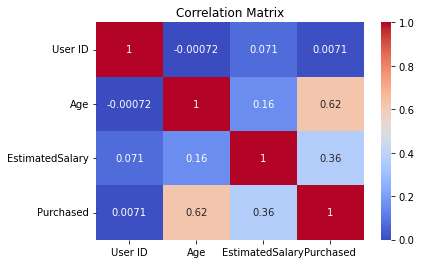

In [10]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [11]:
corr_matrix

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


Preprocessing of the data for better understanding

In [12]:
# Preprocess the data
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

Training and testing split (75:25) along with application of Logistic Regression algorithm to make prediction

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =40)


In [15]:
classifier = LogisticRegression(random_state = 40)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [18]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

From above 2 cells we can observe that the y_test and the correspondant y_pred are a little different.

In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[63  3]
 [16 18]]


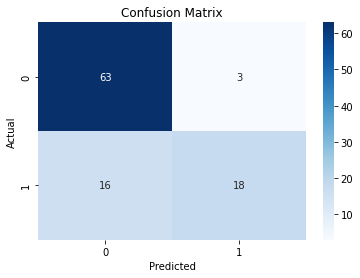

In [20]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
TP = cm[0][0]
FN = cm[1][0]
TN = cm[1][1]
FP = cm[0][1]


print("True Positive:", TP)
print("False Positive:", FP)
print("True Negative:", TN)
print("False Negative:", FN)

True Positive: 63
False Positive: 3
True Negative: 18
False Negative: 16


In [22]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.81
Error Rate: 0.19
Precision: 0.9545454545454546
Recall: 0.7974683544303798


For the above model 81% accuracy is observed with 19% error rate.

In [23]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc

0.8975044563279857

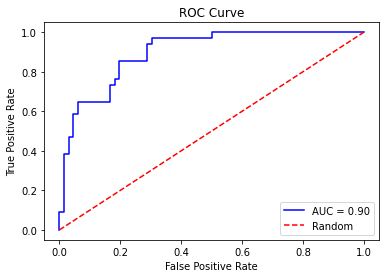

In [24]:
# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The AUC value of 0.9 indicates that the model has good discrimination performance in distinguishing between the positive and negative classes.

Prediction for a random new data point

In [25]:
new_data_point = [[40, 50000]]  # Features of the new data point
new_data_point = sc.transform(new_data_point)  # Scale the new data point using the same scaler as the training data
predicted_class = classifier.predict(new_data_point)

print(f'Predicted class: {predicted_class[0]}')

Predicted class: 0
